***Business Case: Predicting Abalone Age Using Machine Learning***

# **BLUF**

(Enter your BLUF here.)

![](https://i.ytimg.com/vi/hMSOKracH-g/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLAHTAYWNcHDVxSeq0a9ANuDffm5fA)

## Introduction

Abalone farming and harvesting is a valuable industry contributing significantly to the seafood market. Determining the age of abalone is critical for evaluating their maturity, ensuring sustainable harvesting, and maximizing profitability. Traditionally, determining abalone age involves a time-intensive and laborious process of slicing the shell, staining it, and counting growth rings under a microscope. This approach is inefficient and costly, especially when scaled to meet industrial needs. By leveraging machine learning to predict abalone age from easily measurable physical attributes, we can streamline the process, reduce costs, and enhance decision-making for farmers, processors, and regulators.

## Business Problem

The current manual method for determining abalone age is inefficient, requiring significant time, labor, and resources. This inefficiency presents challenges in:

Scaling production to meet growing market demands.

Ensuring sustainable harvesting practices by accurately determining maturity.

Reducing operational costs and improving profitability for stakeholders.

An automated solution using readily available physical measurements could provide a scalable, accurate, and cost-effective method to predict abalone age, addressing these challenges and enabling better business outcomes.

## Executive Summary

This project focuses on predicting abalone age using machine learning models trained on physical attributes such as length, diameter, height, and various weight measurements. By replacing the manual process of counting shell rings, this solution aims to:

## Reduce operational costs and labor requirements.

Improve the accuracy and scalability of age estimation.

Enable sustainable harvesting practices by ensuring abalones are harvested only after reaching maturity.

Our proposed machine learning solution will utilize a dataset of physical measurements, ensuring robust predictions with minimal human intervention. This innovation has the potential to revolutionize the abalone industry by driving efficiency and sustainability while enhancing profitability.

## Challenges

Market Adoption: Convincing stakeholders in the abalone industry to adopt a machine learning solution, especially those accustomed to traditional methods.

Cost of Implementation: Addressing concerns about the upfront investment required to integrate a new technological solution into existing operations.

Stakeholder Alignment: Ensuring all stakeholders, including farmers, processors, and regulators, see value in the solution and align on its implementation.

Regulatory Compliance: Ensuring that the automated age prediction system meets industry regulations and standards for sustainability and product quality.

#**Libraries**

In [ ]:
!pip install -q pycaret autoviz --upgrade psynlig
from pycaret.classification import *
!pip install ucimlrepo

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [ ]:
# Basic Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import absolute
from numpy import loadtxt
from datetime import datetime
import scipy.stats as ss
from scipy.stats.mstats import winsorize
%matplotlib inline

In [ ]:
# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# XGBoost & LightGBM
!pip install lightgbm
from xgboost import XGBRegressor
import lightgbm as lgb

#**Data**
Data source: The data for the project can be downloaded from [here](https://archive.ics.uci.edu/dataset/1/abalone).

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter	/ continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous	 / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years [Target]

##**Importing data**

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets
# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)


{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


#**EDA**

In [ ]:
# Shape
X.shape

(4177, 8)

In [ ]:
# Checking missing values
print('Number of missing Values by Feature\n',X.isnull().sum())
columns_with_NaNs = []
for col in X.columns:
  if X[col].isnull().sum() > 0:
    columns_with_NaNs.append(col)
print('Columns with NaNs:',columns_with_NaNs)

Number of missing Values by Feature
 Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
dtype: int64
Columns with NaNs: []


In [ ]:
#checking dups
duplicates_count = X.duplicated().sum()
print('No. of dups:',duplicates_count)

No. of dups: 0


In [ ]:
# Number of unique values in each feature
X.nunique()

,0
Sex,3
Length,134
Diameter,111
Height,51
Whole_weight,2429
Shucked_weight,1515
Viscera_weight,880
Shell_weight,926


In [ ]:
# Dataframe info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
dtypes: float64(7), object(1)
memory usage: 261.2+ KB


In [ ]:
df = pd.concat([X,y],axis=1)

    Since nrows is smaller than dataset, loading random sample of 2000 rows into pandas...
Shape of your Data Set loaded: (2000, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  7
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    9 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Sinc

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Sex,object,0.000000,0,,,No issue
Length,float64,0.000000,NA,0.140000,0.815000,Column has 23 outliers greater than upper bound (0.85) or lower than lower bound(0.22). Cap them or remove them.
Diameter,float64,0.000000,NA,0.100000,0.650000,"Column has 23 outliers greater than upper bound (0.68) or lower than lower bound(0.15). Cap them or remove them., Column has a high correlation with ['Length']. Consider dropping one of them."
Height,float64,0.000000,NA,0.000000,1.130000,Column has 14 outliers greater than upper bound (0.24) or lower than lower bound(0.04). Cap them or remove them.
Whole_weight,float64,0.000000,NA,0.014000,2.825500,"Column has 13 outliers greater than upper bound (2.22) or lower than lower bound(-0.62). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter']. Consider dropping one of them."
Shucked_weight,float64,0.000000,NA,0.004500,1.253000,"Column has 22 outliers greater than upper bound (0.98) or lower than lower bound(-0.28). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Whole_weight']. Consider dropping one of them."
Viscera_weight,float64,0.000000,NA,0.000500,0.575000,"Column has 11 outliers greater than upper bound (0.49) or lower than lower bound(-0.14). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Whole_weight', 'Shucked_weight']. Consider dropping one of them."
Shell_weight,float64,0.000000,NA,0.004000,1.005000,"Column has 18 outliers greater than upper bound (0.64) or lower than lower bound(-0.17). Cap them or remove them., Column has a high correlation with ['Length', 'Diameter', 'Whole_weight', 'Shucked_weight', 'Viscera_weight']. Consider dropping one of them."
Rings,int64,0.000000,1,2.000000,27.000000,Column has 129 outliers greater than upper bound (15.50) or lower than lower bound(3.50). Cap them or remove them.


Number of All Scatter Plots = 28


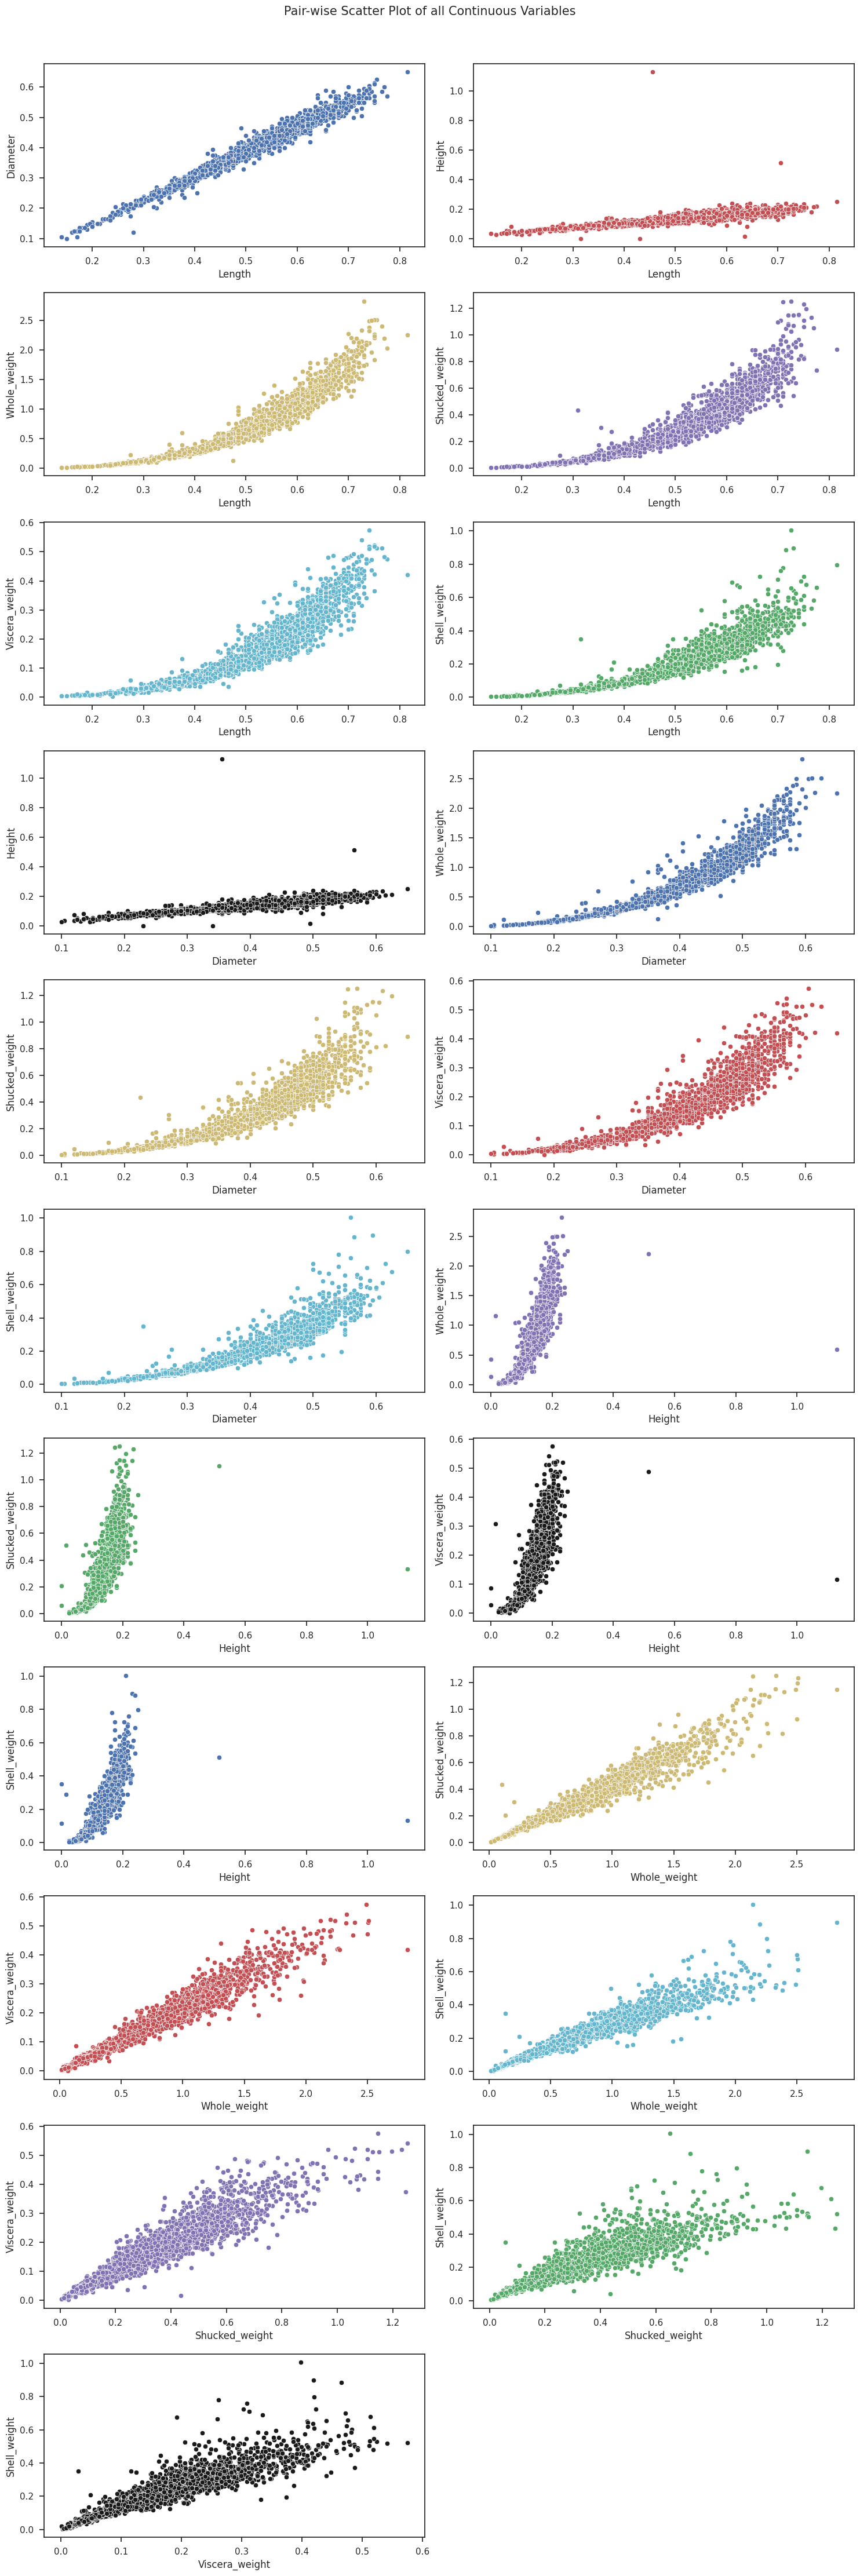

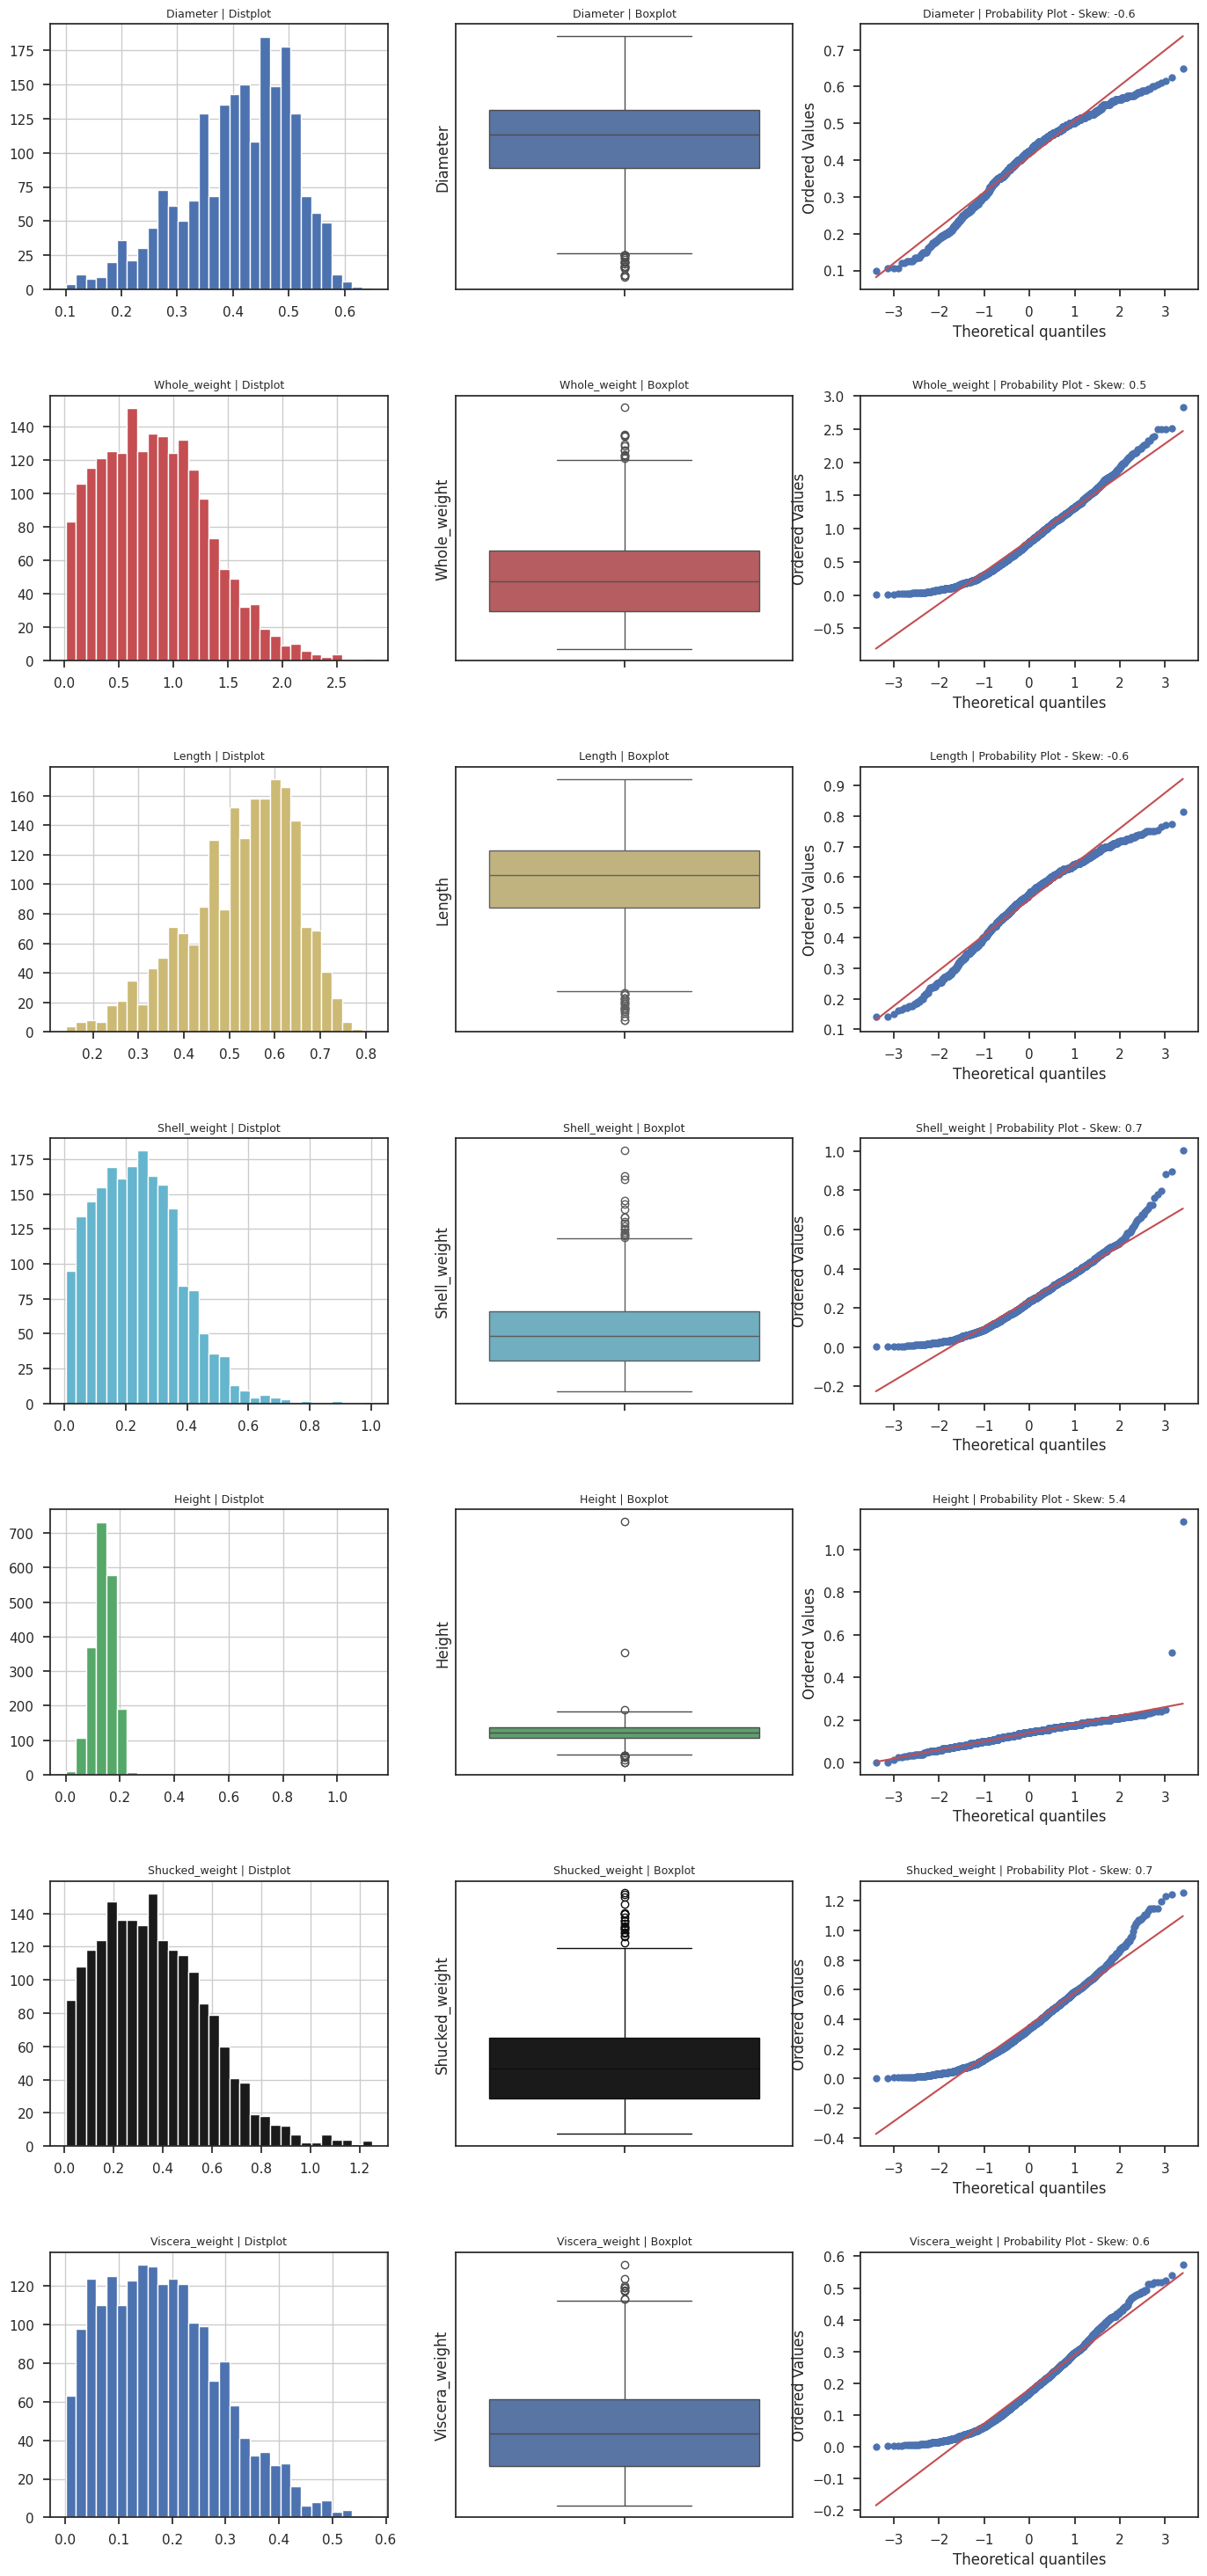

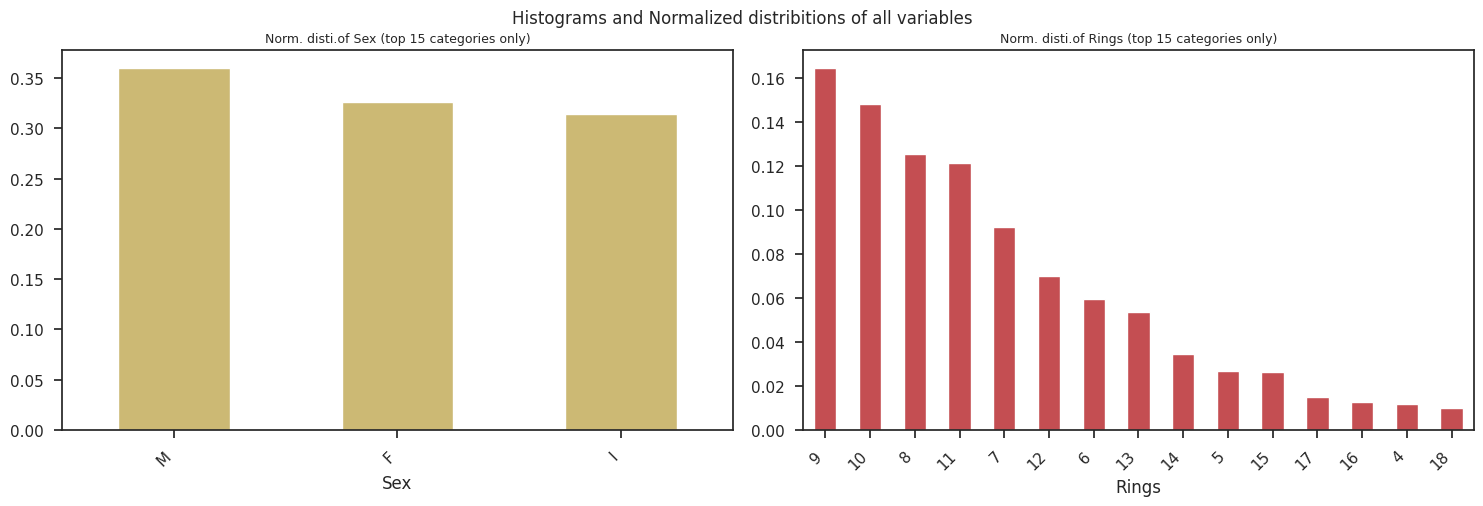

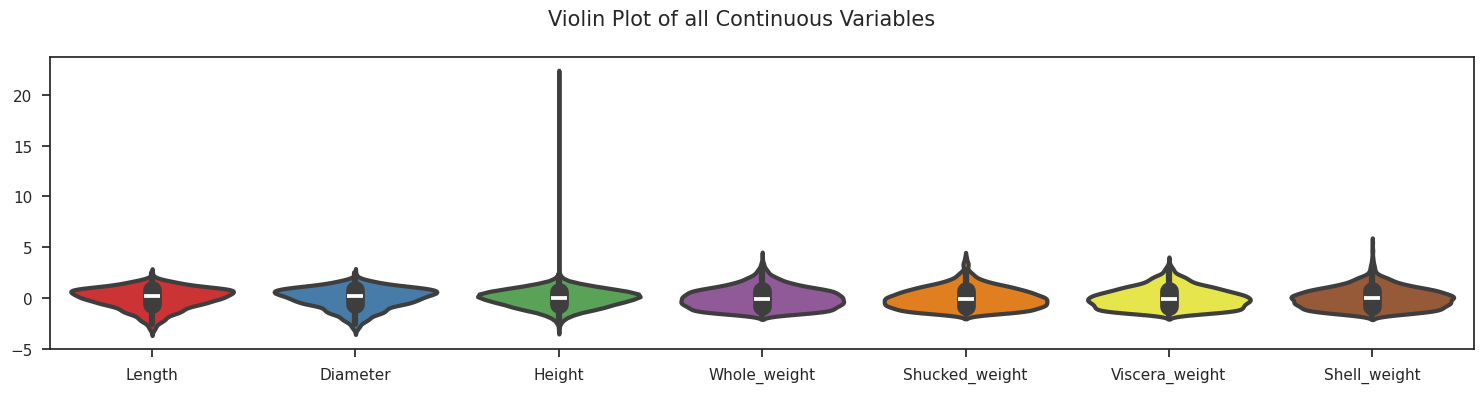

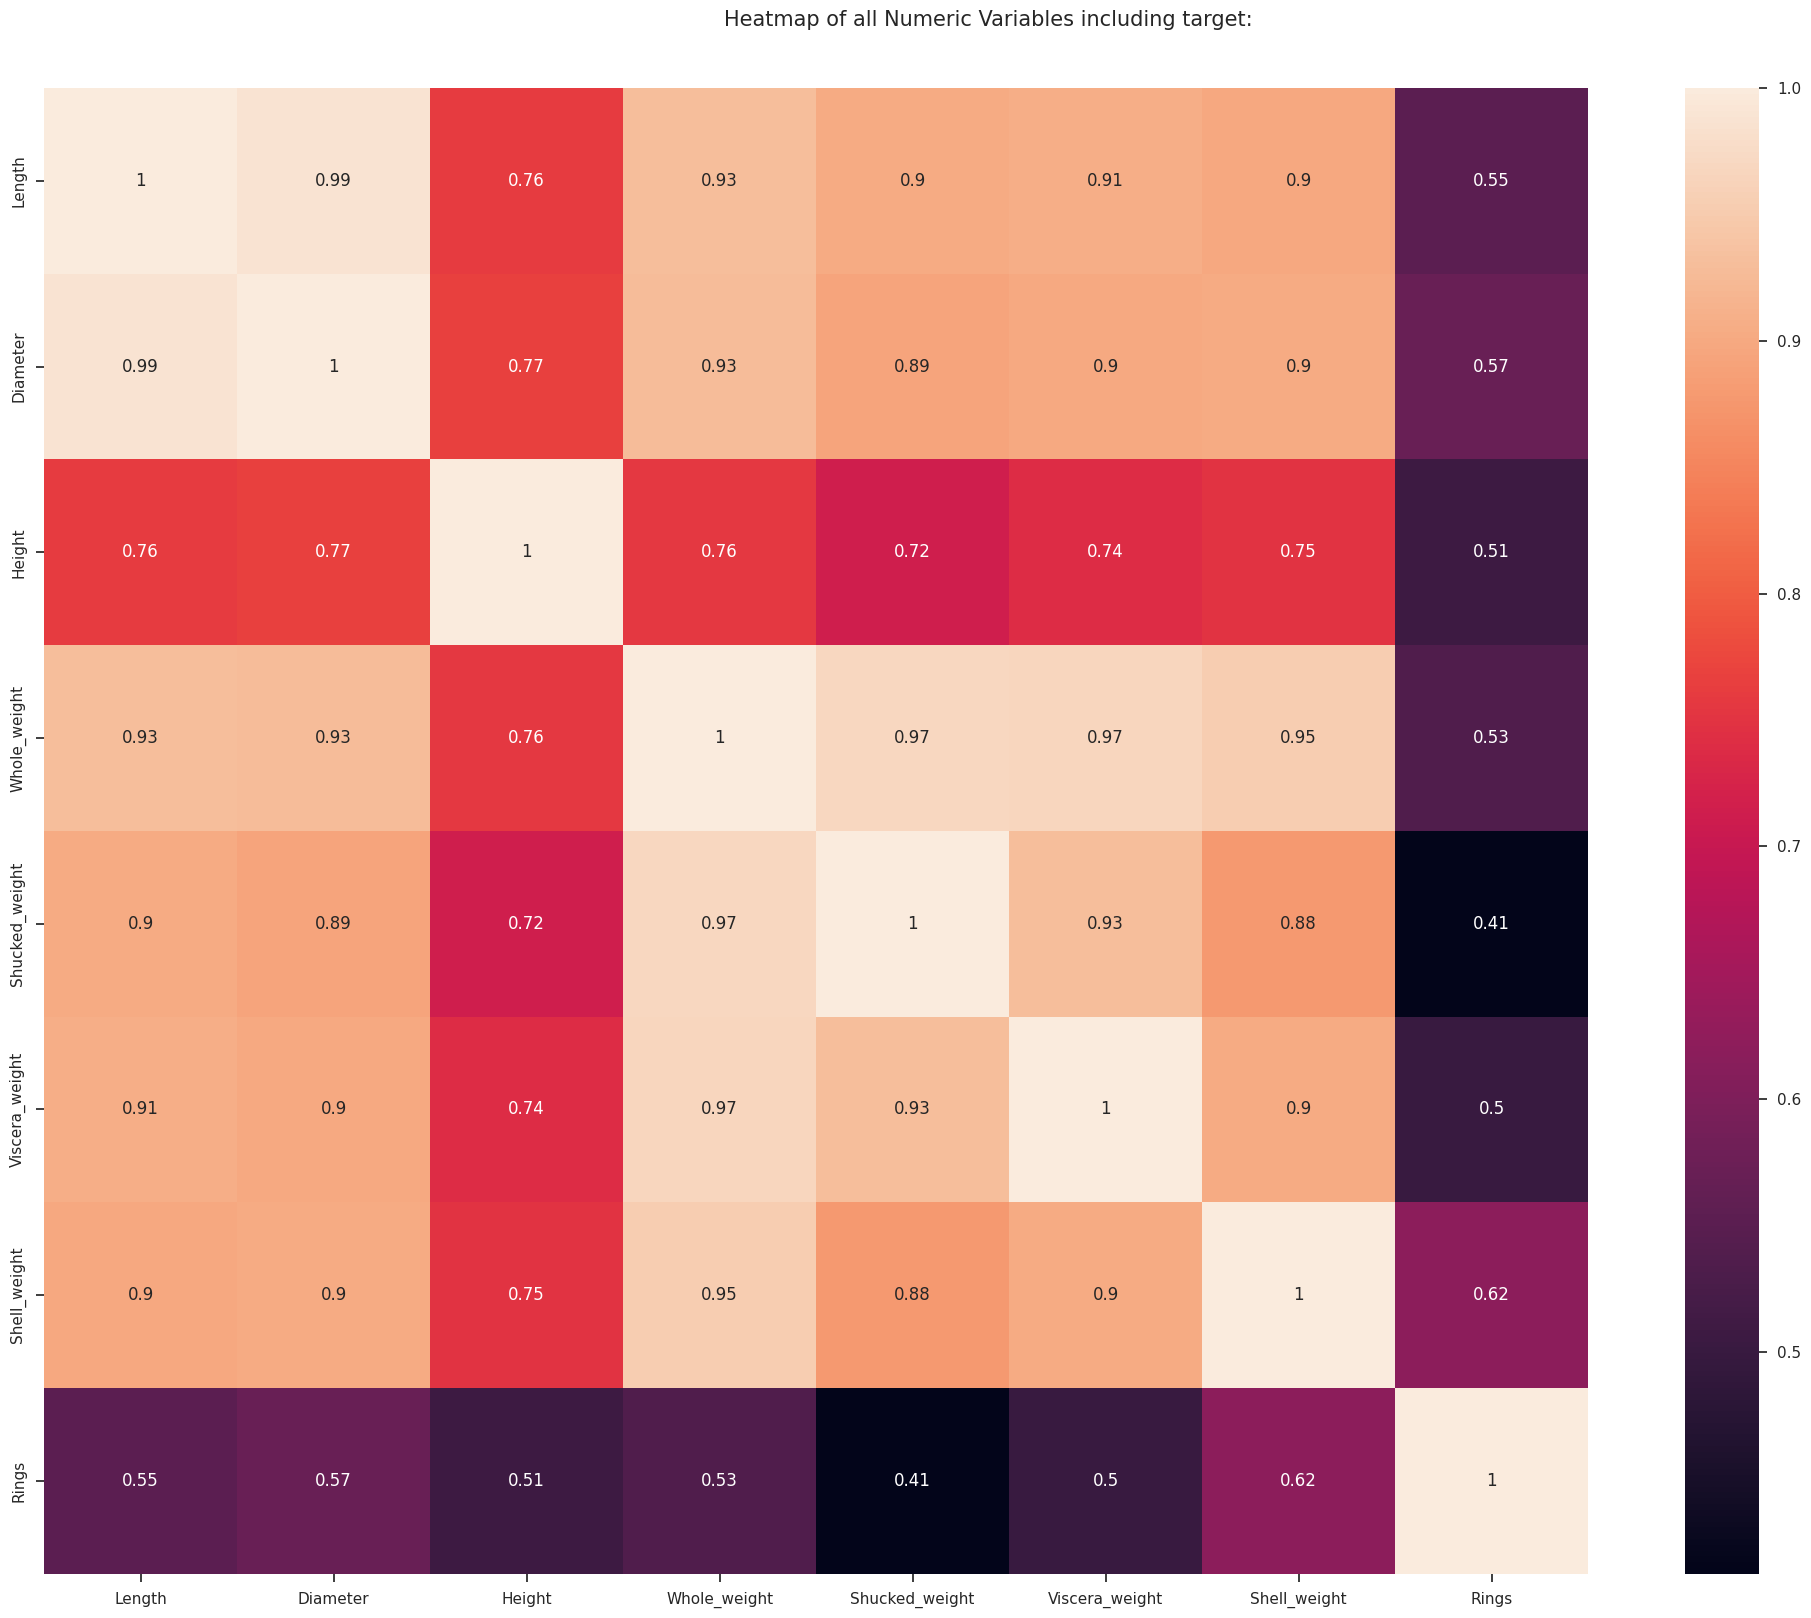

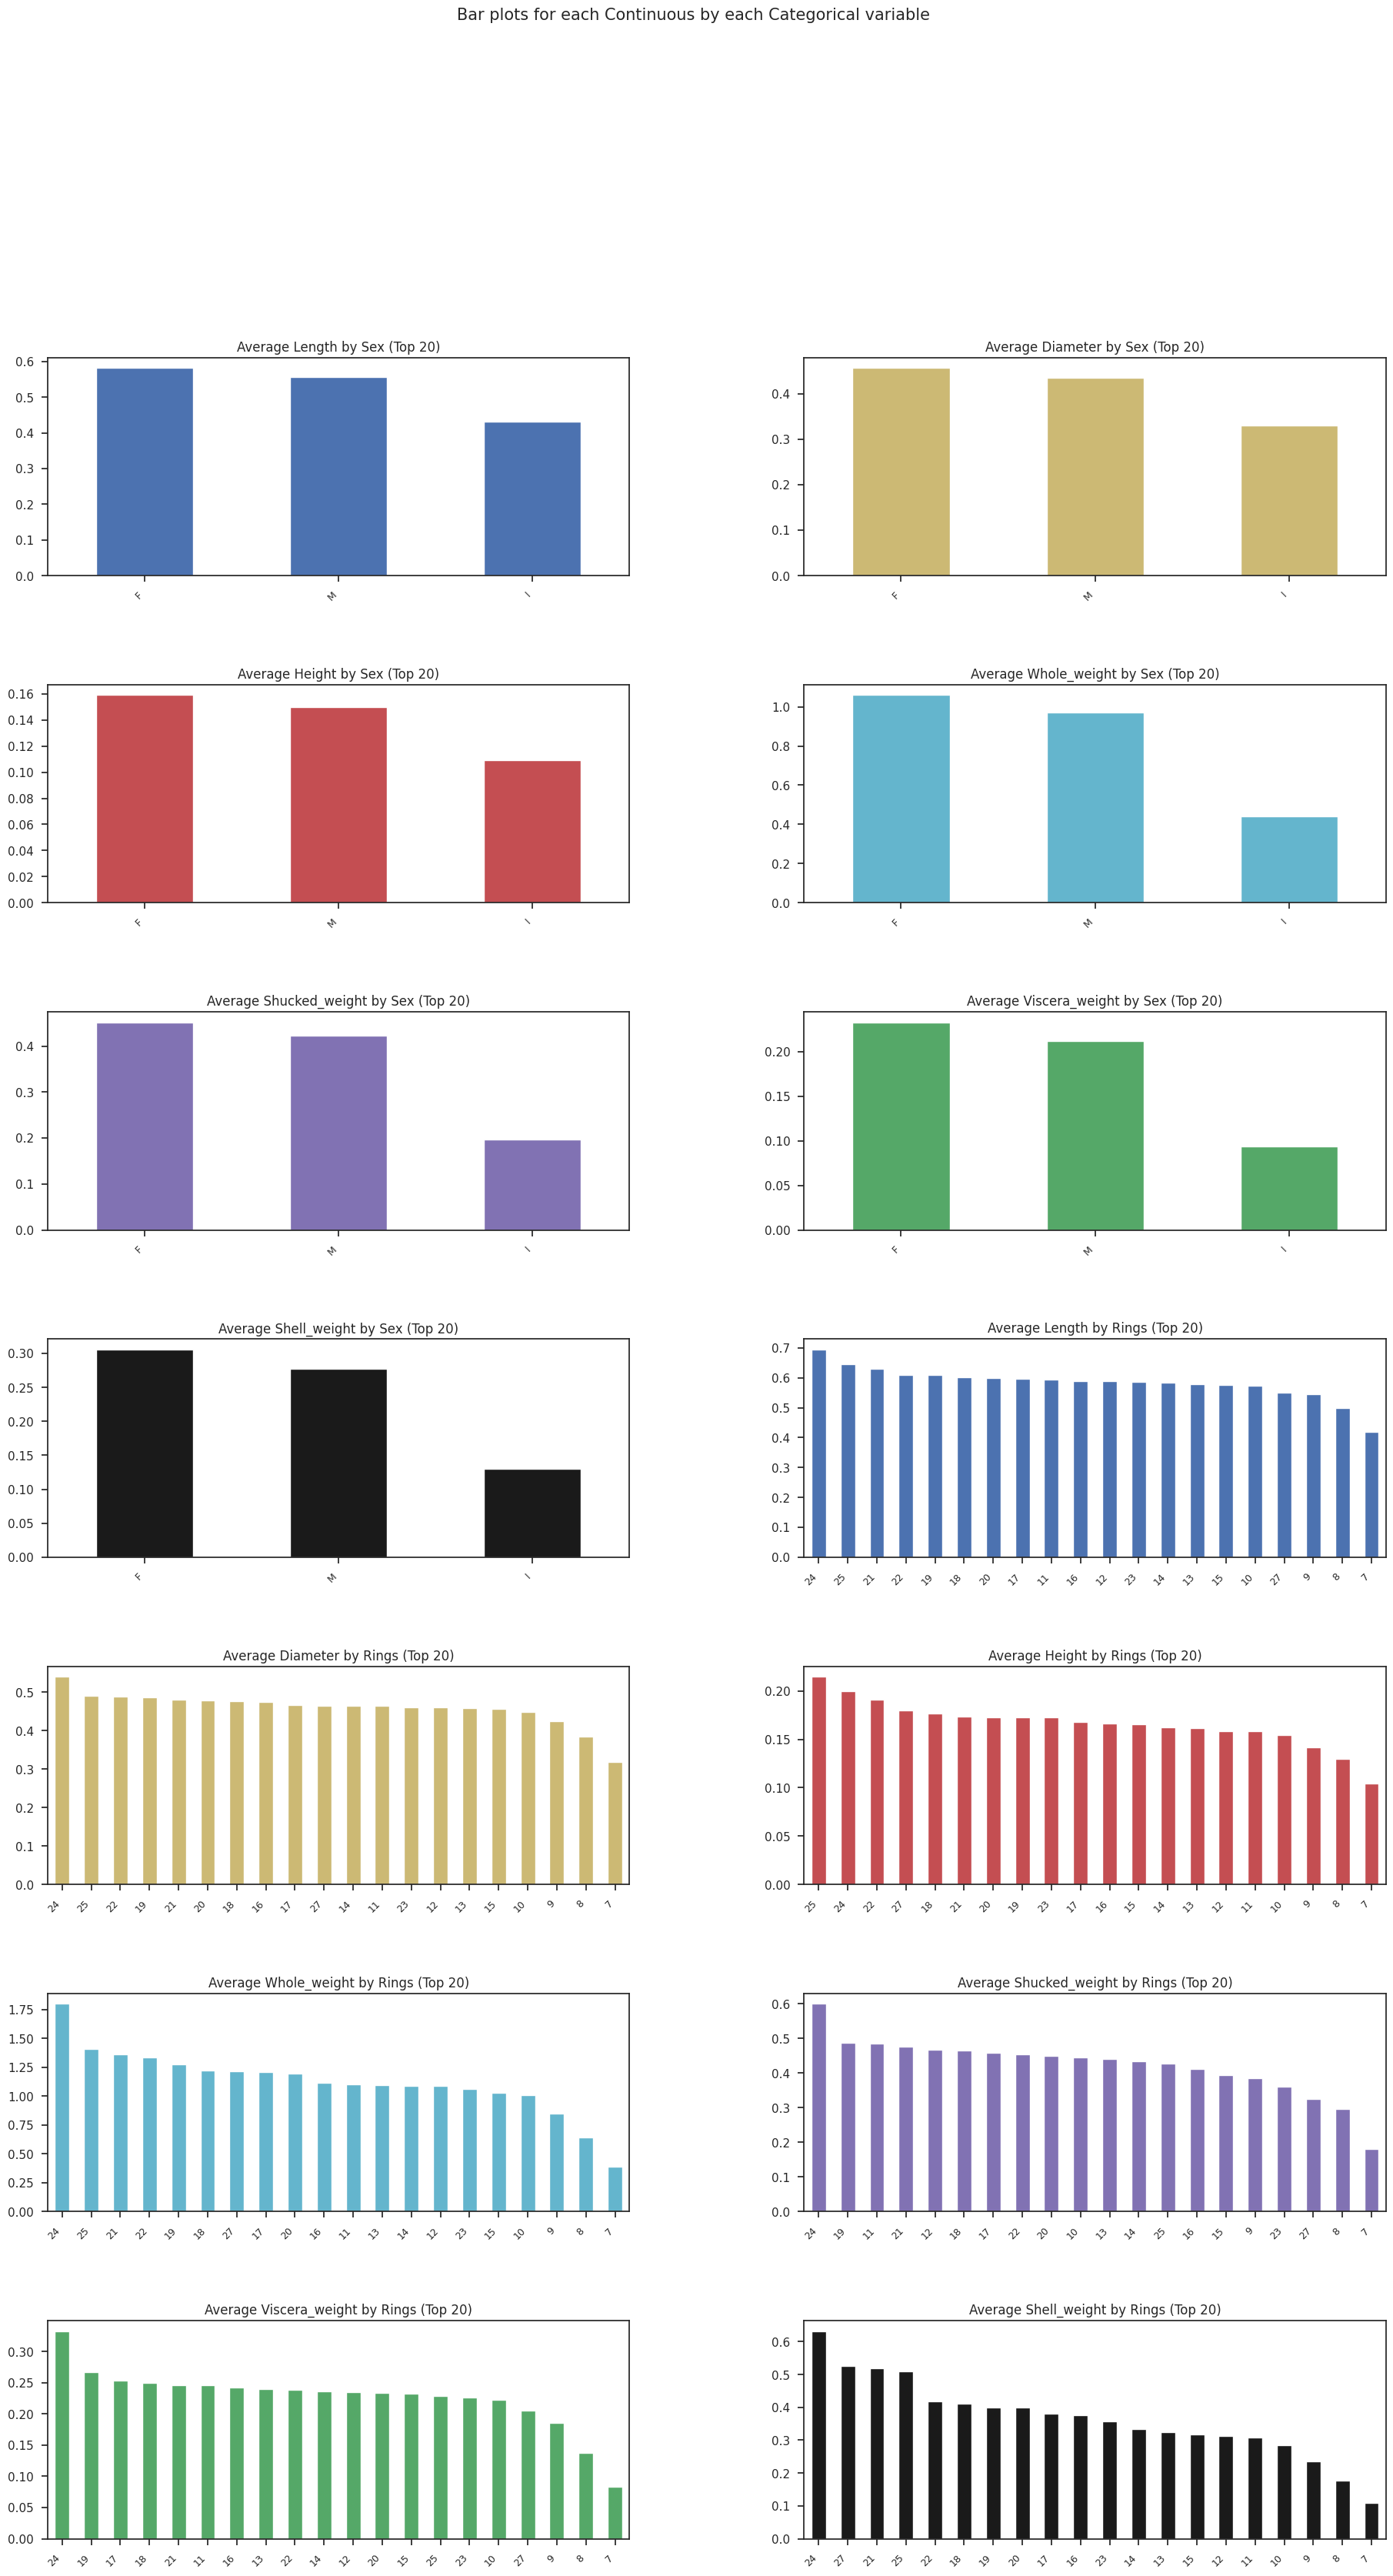

All Plots done
Time to run AutoViz = 36 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
# Get some graphs!
# create an AutoViz class
AV = AutoViz_Class()
# create charts
%matplotlib inline
dftc = AV.AutoViz(filename='', sep ='', dfte = df, header = 0,
verbose = 1, lowess = False, chart_format ='png', max_rows_analyzed = 2000, max_cols_analyzed = 30)

In [ ]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [ ]:
# Descriptive statistics
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
# Skewness of quants
df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight',]].skew()

,0
Length,-0.639873
Diameter,-0.609198
Height,3.128817
Whole_weight,0.530959
Shucked_weight,0.719098
Viscera_weight,0.591852
Shell_weight,0.620927


In [ ]:
#Encoding the Post type

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex'].unique()

array([2, 0, 1])

In [ ]:
# Check skewness of target
y.skew(axis = 0, skipna = True)

,0
Rings,1.114102


In [ ]:
# Tukey Rule outliers for target (price/ping)
def tukey_rule(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_lim = data[col].quantile(0.5) + 2 * IQR
    lower_lim = data[col].quantile(0.5) - 2 * IQR
    outliers = []
    for index, x in enumerate(data[col]):
        if x < lower_lim or x >= upper_lim:
            outliers.append(index)
    return outliers

# # Identify outliers
print('OUTLIERS:\n)')
col = 'Rings'
outliers_Tukey = tukey_rule(y,col)
print("Column ",col,": ",outliers_Tukey)
X = X.drop(labels=outliers_Tukey, axis=0)
y = y.drop(labels=outliers_Tukey, axis=0)


OUTLIERS:
)
Column  Rings :  [0, 6, 7, 9, 28, 31, 32, 33, 36, 72, 75, 82, 83, 90, 94, 101, 102, 128, 129, 130, 142, 150, 157, 163, 164, 166, 167, 181, 197, 198, 229, 232, 236, 240, 253, 254, 255, 256, 258, 270, 271, 273, 275, 277, 278, 280, 287, 290, 292, 293, 294, 310, 312, 313, 314, 318, 334, 337, 339, 351, 354, 355, 357, 358, 359, 360, 362, 363, 365, 369, 370, 371, 372, 375, 378, 380, 407, 410, 415, 416, 417, 418, 426, 427, 428, 429, 430, 431, 432, 433, 442, 447, 449, 450, 451, 452, 456, 468, 469, 475, 477, 478, 479, 480, 481, 482, 483, 487, 493, 494, 495, 497, 501, 502, 504, 505, 507, 509, 530, 540, 542, 550, 570, 572, 573, 579, 582, 592, 593, 599, 600, 613, 614, 621, 623, 624, 628, 642, 656, 657, 658, 660, 664, 667, 671, 672, 673, 674, 675, 678, 683, 685, 687, 699, 719, 722, 723, 725, 729, 732, 734, 743, 744, 745, 746, 749, 754, 756, 757, 759, 760, 761, 762, 769, 776, 778, 779, 785, 795, 807, 811, 882, 883, 891, 1394, 1747, 1933, 1957, 2090, 2101, 2107, 2108, 2138, 2151, 2155, 215

<Axes: xlabel='Rings'>

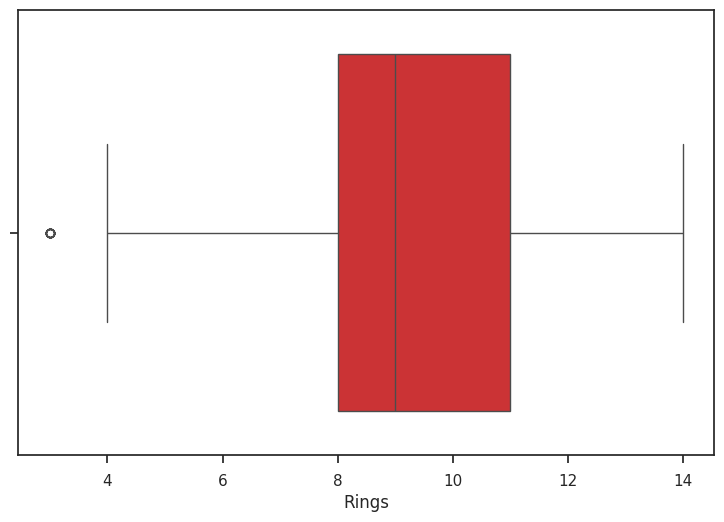

In [ ]:
# Boxplot y to check outliers
sns.boxplot(x=y['Rings'])

In [ ]:
X = pd.DataFrame(df.drop(['Rings'],axis=1))
y = pd.DataFrame(df['Rings'])
y.columns = ['Rings']
print('X:\n',X.head())
print('\ny\n',y.head())

X:
    Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   2    0.455    0.365    0.095     0.5140         0.2245       
1   2    0.350    0.265    0.090     0.2255         0.0995       
2   0    0.530    0.420    0.135     0.6770         0.2565       
3   2    0.440    0.365    0.125     0.5160         0.2155       
4   1    0.330    0.255    0.080     0.2050         0.0895       

   Viscera_weight  Shell_weight  
0      0.1010          0.150     
1      0.0485          0.070     
2      0.1415          0.210     
3      0.1140          0.155     
4      0.0395          0.055     

y
    Rings
0   15  
1    7  
2    9  
3   10  
4    7  


#**Feature Importance**


In [ ]:
# Create holdout sample
# Note: split before doing any trasformations on the data!!!

X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.2,    # 80-20 training vs test set split
                     random_state=0)
print('Shape of X and y',X.shape, y.shape, '\nShape of training set X and y',X_train.shape, y_train.shape, '\nShape of test set X and y',X_test.shape, y_test.shape)


Shape of X and y (4177, 8) (4177, 1) 
Shape of training set X and y (3341, 8) (3341, 1) 
Shape of test set X and y (836, 8) (836, 1)


In [ ]:
# Bringing features onto the same scale：normalization and standardization:

# Min-max scaling(Normalization) (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

# mms = MinMaxScaler()
# X_norm = mms.fit_transform(X)

# Standardization z-score  (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)
# from sklearn.preprocessing import StandardScaler
stdsc1 = StandardScaler()
X_train_std = stdsc1.fit_transform(X_train)
X_test_std = stdsc1.transform(X_test)
stdsc2 = StandardScaler()
y_train_std = stdsc2.fit_transform(y_train)
y_test_std = stdsc2.transform(y_test)

<BarContainer object of 8 artists>

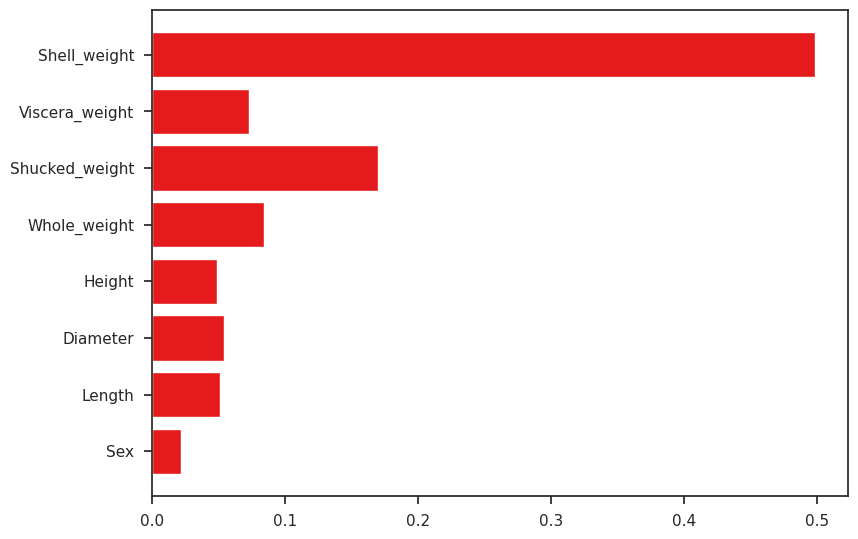

In [ ]:
# Feature Importance
# Code adapted from this source: https://machinelearningmastery.com/calculate-feature-importance-with-python/
# Let's try to weed out the really poor predictors
from matplotlib import pyplot                            # Import pyplot (to be able generate the barchart later in this snippet)
plt.rcParams["figure.figsize"] = (8,6)
model = RandomForestRegressor()                         # Create an instance of a RandomForestClassifier
# fit the model
model.fit(X_train_std, y_train_std)                  # Fit the RandomForest instance using the traiing data
# get importance
importance = model.feature_importances_                  # The RandomForestClassifier instance computes feature importance as a bonus. Store them imprtance values in importance'.
# summarize feature importance
col_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight']
plt.barh(col_names, model.feature_importances_)

#**Base Learner Regressors on Holdout Sample**

In [ ]:
# Report performance
def Performance(actuals,predictions):
  print('MSE: %.2f ' % mean_squared_error(actuals, predictions))
  print('MAE: %.2f ' % mean_absolute_error(actuals,predictions))
  print('R^2: %.2f' % r2_score(actuals, predictions))

# Plotting the actuals vs predictions
def PredsVsActuals(actuals,predictions):
  plt.plot(actuals, predictions, '.', color='blue')
  plt.xlabel('Actuals')
  plt.ylabel('Predictions')
  plt.show()

REGRESSOR:  Multiple Linear Regression 

Coefficients: 
 [ 0.01862021 -0.04916402  0.41804742  0.12242003  1.48845763 -1.44718297
 -0.33947656  0.35551373]
MSE: 5.10 
MAE: 1.61 
R^2: 0.53


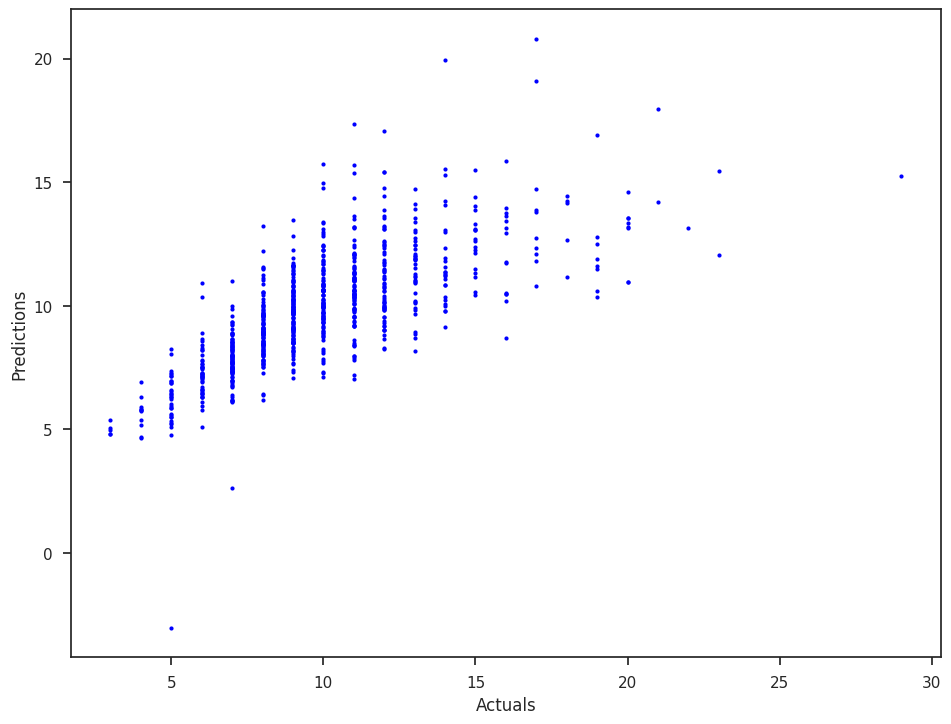

Maximum error:  81.83346034165628 %


REGRESSOR:  Lasso Regression 

Coefficients: 
 [-0.          0.          0.          0.          0.          0.
  0.          0.12515418]
MSE: 9.38 
MAE: 2.28 
R^2: 0.14


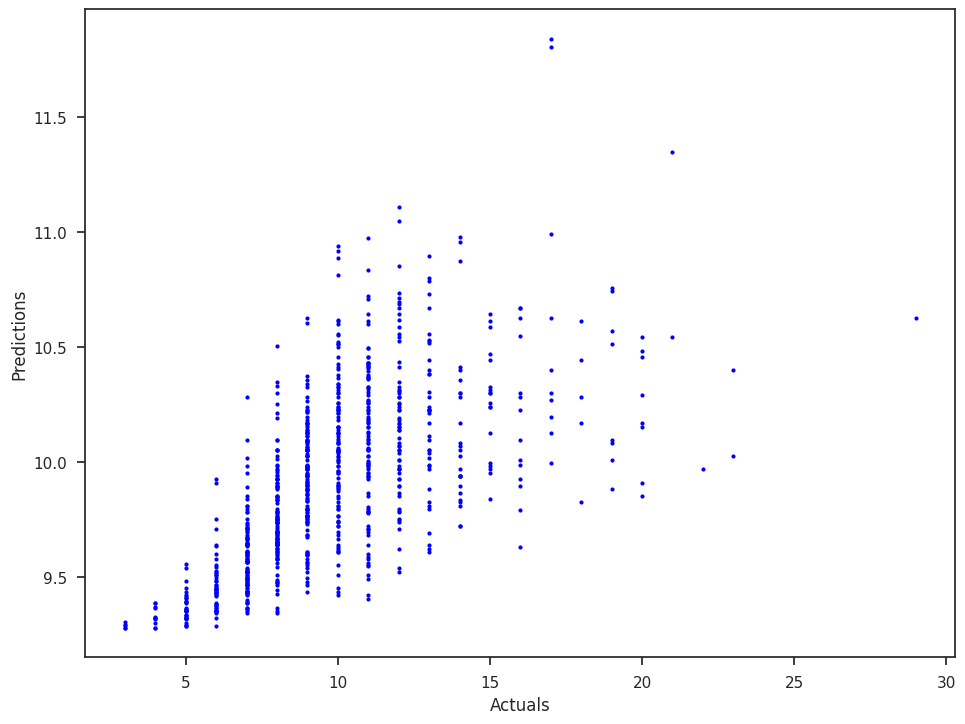

Maximum error:  210.1994845682249 %


REGRESSOR:  Ridge Regression 

Coefficients: 
 [ 0.01855714 -0.04732054  0.41580351  0.1225252   1.45665726 -1.43192317
 -0.33223907  0.36608897]
MSE: 5.10 
MAE: 1.61 
R^2: 0.53


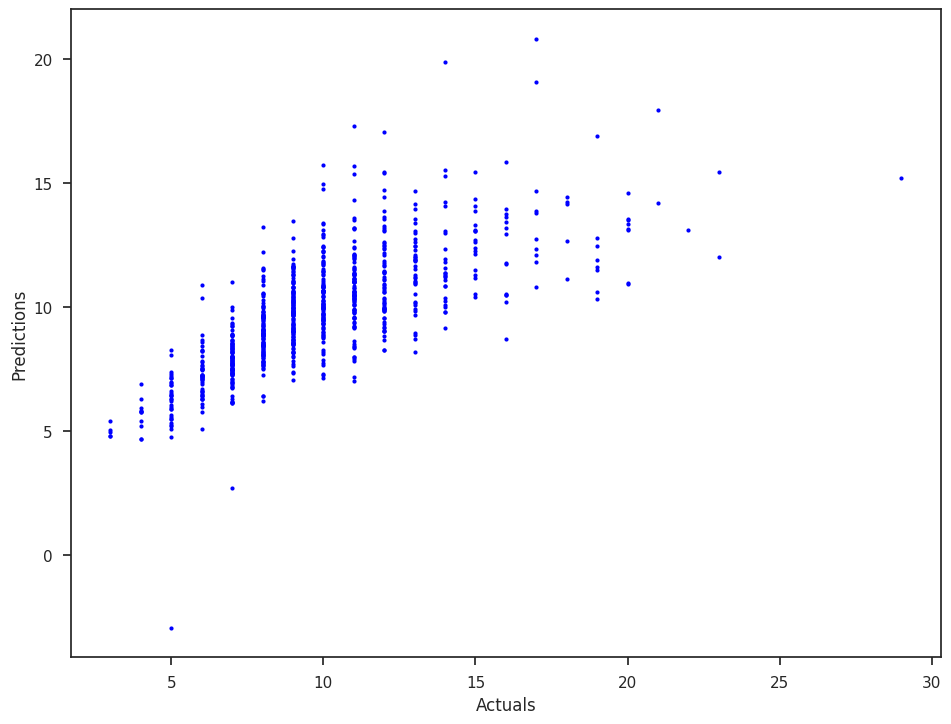

Maximum error:  81.63260843066882 %


REGRESSOR:  ElasticNet Regression 

Coefficients: 
 [-0.          0.          0.07595809  0.07191944  0.         -0.
  0.          0.33244617]
MSE: 6.75 
MAE: 1.89 
R^2: 0.38


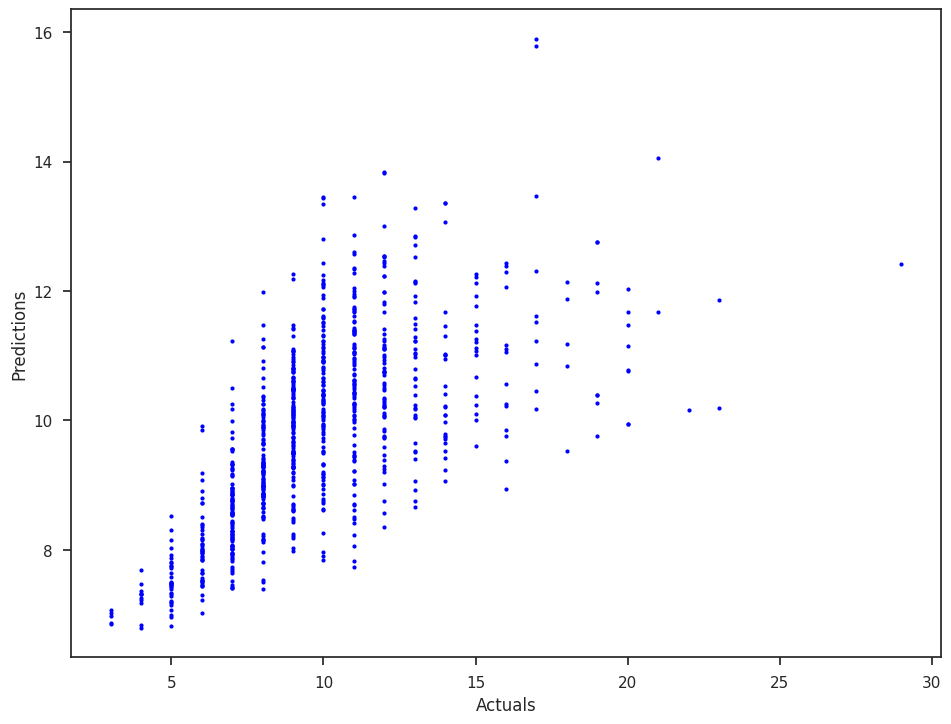

Maximum error:  135.6195014780901 %


REGRESSOR:  kNN 

MSE: 5.45 
MAE: 1.60 
R^2: 0.50


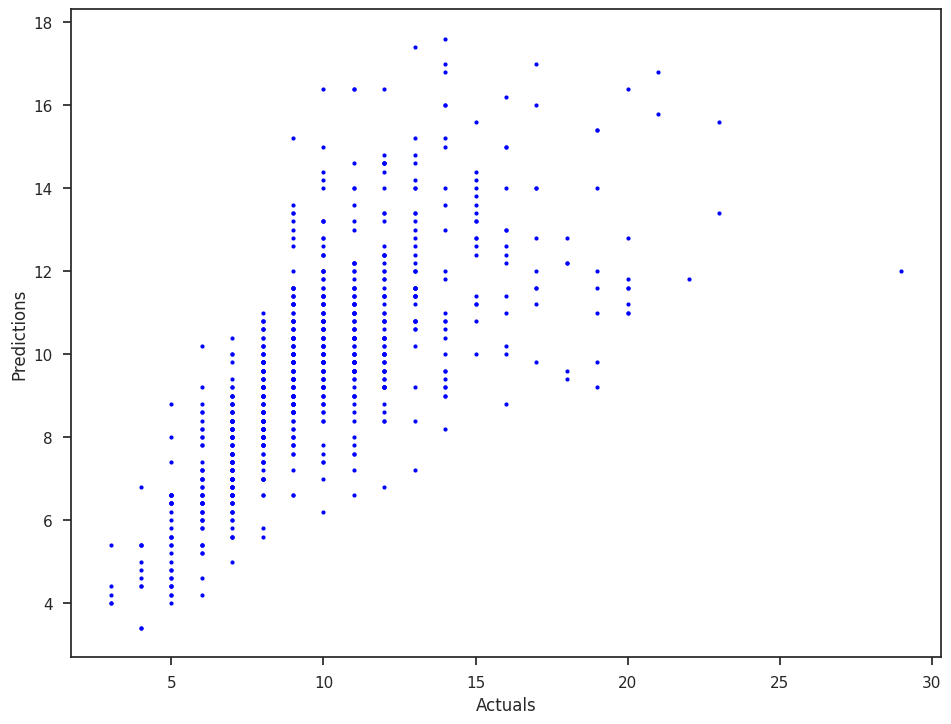

Maximum error:  79.99999999999999 %


REGRESSOR:  SVR 

MSE: 6.44 
MAE: 1.77 
R^2: 0.41


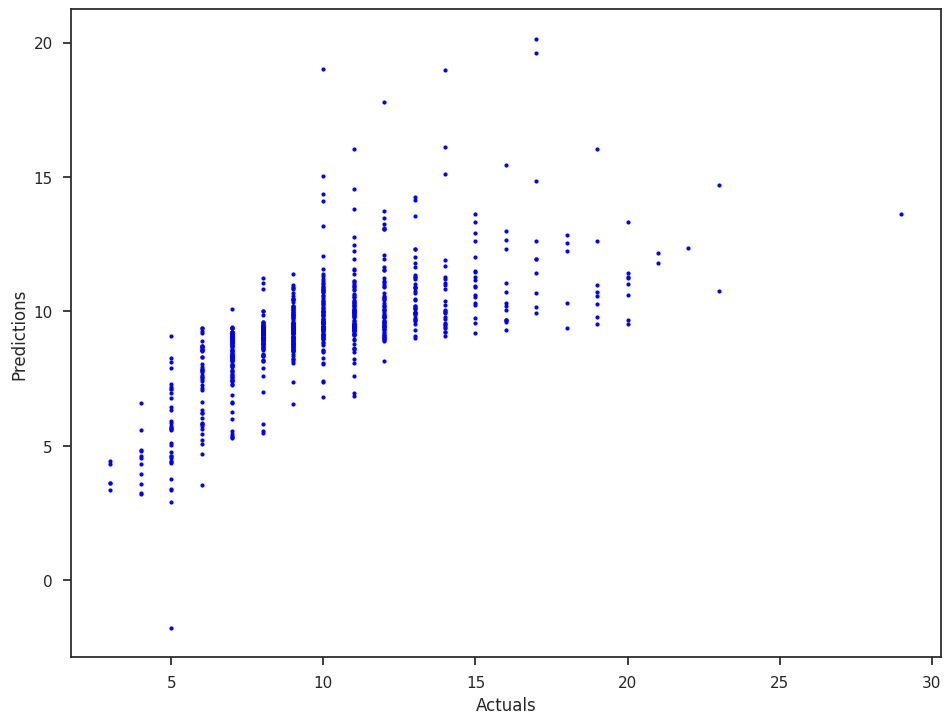

Maximum error:  90.21863511004845 %


REGRESSOR:  Decision Tree 

MSE: 8.67 
MAE: 2.03 
R^2: 0.20


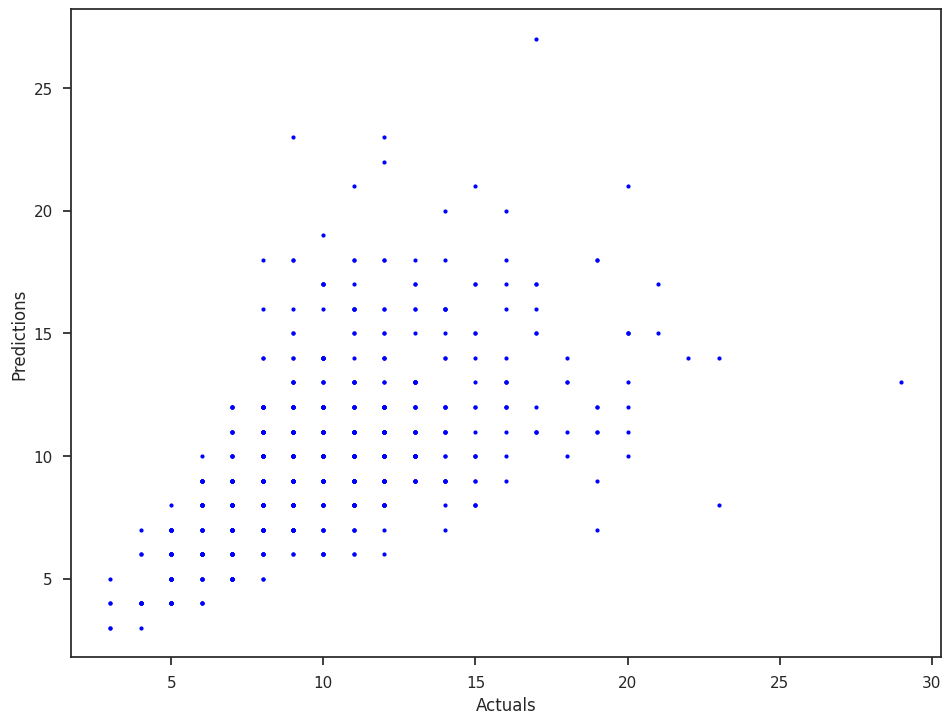

Maximum error:  155.55555555555557 %


REGRESSOR:  Multilayer Perceptron 

MSE: 10.90 
MAE: 2.48 
R^2: -0.00


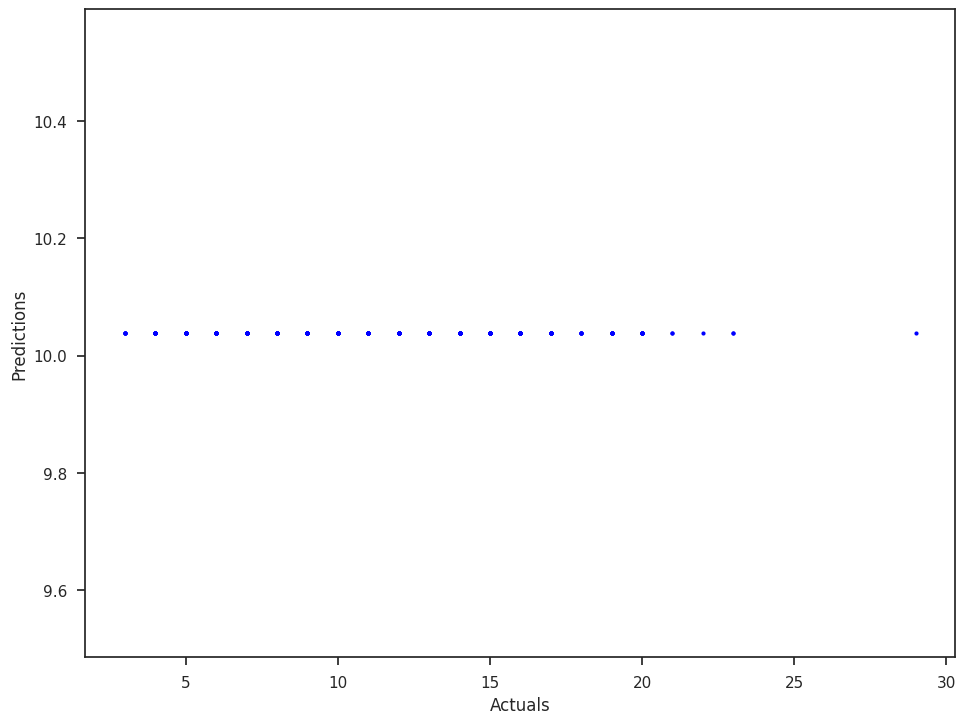

Maximum error:  234.59694605093966 %




In [ ]:
# Loop through base learners
names = ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression','kNN', 'SVR','Decision Tree','Multilayer Perceptron']
regressors = [linear_model.LinearRegression(),
              Lasso(alpha=0.5),
              Ridge(alpha=0.5),
              ElasticNet(alpha=0.25, l1_ratio=0.5),
              KNeighborsRegressor(n_neighbors=5),
              SVR(kernel = 'poly'),   #Can try kernels 'poly', 'linear' and 'sigmoid' kernels
              DecisionTreeRegressor(),
              MLPRegressor(hidden_layer_sizes=(150,150,1),
                       max_iter = 300,activation = 'relu',
                       solver = 'adam')]

for name, regr in zip(names, regressors):
  print('REGRESSOR: ',name,'\n')
  regr.fit(X_train_std, np.ravel(y_train_std))
  # Make predictions
  y_pred_std = regr.predict(X_test_std)
  y_pred_std = pd.DataFrame(y_pred_std)
  y_pred = stdsc2.inverse_transform(y_pred_std)
  if name in ['Multiple Linear Regression', 'Lasso Regression', 'Ridge Regression','ElasticNet Regression']:
      print('Coefficients: \n', regr.coef_)
  # Performance
  plt.figure(figsize=(10,8))
  Performance(y_test,y_pred)
  PredsVsActuals(y_test,y_pred)
  # Worst-case instance prediction
  y_pred = pd.DataFrame(y_pred)
  results = pd.concat([y_pred, y_test.set_index(y_pred.index)], axis=1)
  results.columns=['Pred','Act']
  results['error'] = (results.Pred - results.Act)/results.Act
  print('Maximum error: ',100*np.max(results.error),'%\n\n')